In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [2]:
def logistic_func(x):

    L = 1/(1+np.exp(-x))
    return L


In [3]:
def train(X_train, y_train, tol=10 ** -4):

    LearningRate = 0.05
    x1 = X_train[:,0]
    x2 = X_train[:,1]
    x0 = np.ones(len(x1))
    w1 = 0.01
    w2 = 0.01
    w0 = 0.01
    W = [w0, w1, w2]
    X = [x0, x1, x2]
    cw = [1,1,1]
    oldw = [1,1,1]
    diff = tol + 1
    weights = []
    
    while diff > tol:
        for n,i in enumerate(cw):
            cw[n] = 0.0
        for t in range(len(x1)):
            O = 0
            for j in range(len(W)):
                O = O + W[j] * X[j]
            y = 1.0/(1.0+np.exp(-O))
            #y = expit(O)
            for j in range(len(W)):
                cw[j] = cw[j] + (y_train[t]- y[t]) * X[j][t]
        for j in range(len(W)):
            oldw[j] = W[j]
            W[j] = W[j] + LearningRate * cw[j]
            diff = abs(W[j] - oldw[j]).sum()
        weights = W
    return weights

In [4]:
def train_matrix(X_train, y_train, tol=10 ** -4):

    LearningRate = 0.05

    x0 =  np.ones((X_train.shape[0], 1))
    X = np.concatenate((x0,X_train), axis = 1)
    W = np.array([0.01,0.01,0.01])
    W = W.reshape(3, 1)
    Y = y_train.reshape(750, 1)
    D = (X, Y)
    diff = tol + 1
    weights = []
    while diff > tol:
        for t in range(len(X)):
            O = 0
            O = O + X @ W
            y = 1.0/(1.0+np.exp(-O))
            oldW = W
            W = W + LearningRate * X.T @ (Y - y)
            diff = abs(W - oldW).sum()
            weights = W
            
    return weights

In [5]:
def predict(X_test, weights):
    
    x0 =  np.ones((X_test.shape[0], 1))
    X = np.concatenate((x0,X_test), axis = 1)
    W = weights
    y = 1.0/(1.0+np.exp(-(X@W)))
    y[ y >= 0.5] = 1
    y[ y < 0.5] = 0
    predictions = y
    return predictions

In [6]:
def plot_prediction(X_test, X_test_prediction):
    X_test1 = X_test[X_test_prediction == 0, :]
    X_test2 = X_test[X_test_prediction == 1, :]
    plt.scatter(X_test1[:, 0], X_test1[:, 1], color='red')
    plt.scatter(X_test2[:, 0], X_test2[:, 1], color='blue')
    plt.show()

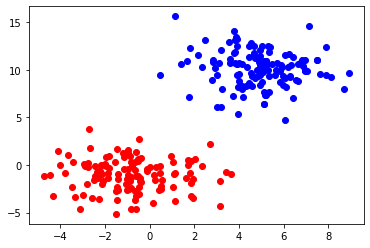

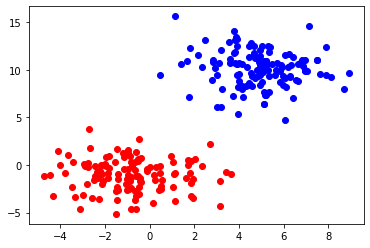

Number of wrong predictions is: 0


In [7]:
n_samples = 1000

centers = [(-1, -1), (5, 10)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.8,
                  centers=centers, shuffle=False, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Experiments
w = train(X_train, y_train)
X_test_prediction = predict(X_test, w)
plot_prediction(X_test, X_test_prediction)
plot_prediction(X_test, y_test)

wrong = np.count_nonzero(y_test - X_test_prediction)
print('Number of wrong predictions is: ' + str(wrong))
